In [3]:
import math
import random
import time
from jupyterthemes import jtplot
jtplot.style()

import gym
gym.logger.set_level(40)
import numpy as np


import nnabla as nn
import nnabla.logger as logger
import nnabla.functions as F
import nnabla.parametric_functions as PF
import nnabla.solver as S
from nnabla.contrib.context import extension_context
from nnabla.monitor import Monitor, MonitorSeries, MonitorTimeElapsed

2018-08-10 14:38:05,621 [nnabla][INFO]: Initializing CPU extension...


In [4]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
env = gym.make("CartPole-v0")


In [6]:
epsilon_start = 1.0
epsilon_final = 0.01
epsilon_decay = 500

epsilon_by_frame = lambda frame_idx: epsilon_final + (epsilon_start - epsilon_final) * math.exp(-1. * frame_idx / epsilon_decay)

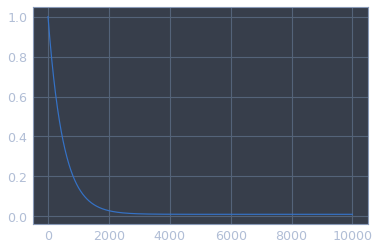

In [7]:
plt.plot([epsilon_by_frame(i) for i in range(10000)])

In [8]:
hidden_size = 128
max_frames = 50
batch_size = 1

In [18]:
class DQN:
    def __init__(self, num_states, num_actions):
        self.state_dim = num_states
        self.action_dim = num_actions 
        self.state = nn.Variable([batch_size, self.state_dim])
    
    def forward(self, x):
        with nn.parameter_scope("DQN"):
            with nn.parameter_scope("affine1"):
                h = F.relu(PF.affine(x, hidden_size))
            with nn.parameter_scope("affine2"):
                h = F.relu(PF.affine(h, hidden_size))
            with nn.parameter_scope("affine3"):
                y = PF.affine(h, self.action_dim)
        return y
    
    def act(self, state, epsilon):
        if random.random() > epsilon:
            self.state.d = state
            q_value = self.forward(self.state)
            print(q_value.d)
            action  = np.argmax(q_value.d)
            print("action:",action)
        else:
            action = random.randrange(self.action_dim)
        return action

In [19]:
print("state_num ",env.observation_space.shape[0])
print("action_num ",env.action_space.n)

model = DQN(env.observation_space.shape[0], env.action_space.n)
#z = np.random.randn(1,4)
#z2 = nn.Variable.from_numpy_array(np.random.randn(4))
#model.act(z,0.0)

state_num  4
action_num  2
[[0. 0.]]
action: 0


0

In [23]:
state = env.reset()
for frame in range(1, max_frames):
    epsilon = epsilon_by_frame(frame)
    print(state,frame)
    action = model.act(state, epsilon)
#    print(action)
    next_state, reward, done, _ = env.step(action)
#    replay_buffer.push(state, action, reward, next_state, done)
    state = next_state
#   episode_reward += reward   
    if done:
        print("done")
        state = env.reset()
"""    
    state = next_state
    episode_reward += reward
    
    if done:
        state = env.reset()
        all_rewards.append(episode_reward)
        episode_reward = 0
        
    if len(replay_buffer) > batch_size:
        loss = compute_td_loss(batch_size)
        losses.append(loss.data[0])
        
    if frame_idx % 200 == 0:
        plot(frame_idx, all_rewards, losses)
        
""" 

[0.00556203 0.0230772  0.02182349 0.00785329] 1
[ 0.00602357 -0.17235082  0.02198056  0.30734112] 2
[0.00257656 0.02245114 0.02812738 0.02167053] 3
[ 0.00302558  0.21715866  0.02856079 -0.26200687] 4
[0.00736875 0.02164091 0.02332065 0.03954589] 5
[ 0.00780157 -0.17380756  0.02411157  0.33949452] 6
[0.00432542 0.02096315 0.03090146 0.05451148] 7
[ 0.00474468  0.21562871  0.03199169 -0.22826386] 8
[0.00905726 0.02006453 0.02742641 0.07433626] 9
[ 0.00945855 -0.17543966  0.02891314  0.3755446 ] 10
[ 0.00594976 -0.3709601   0.03642403  0.67720196] 11
[-0.00146945 -0.17636265  0.04996807  0.3962057 ] 12
[-0.0049967  -0.37215663  0.05789218  0.7042146 ] 13
[-0.01243983 -0.17788268  0.07197647  0.43030267] 14
[-0.01599749  0.01615015  0.08058253  0.16114982] 15
[-0.01567448  0.21003154  0.08380552 -0.10506292] 16
[-0.01147385  0.40385875  0.08170427 -0.37017334] 17
[[0. 0.]]
action: 0
[-0.00339668  0.20767677  0.0743008  -0.05288771] 18
[ 0.00075686  0.40165904  0.07324305 -0.32123397] 19
[ 

'    \n    state = next_state\n    episode_reward += reward\n    \n    if done:\n        state = env.reset()\n        all_rewards.append(episode_reward)\n        episode_reward = 0\n        \n    if len(replay_buffer) > batch_size:\n        loss = compute_td_loss(batch_size)\n        losses.append(loss.data[0])\n        \n    if frame_idx % 200 == 0:\n        plot(frame_idx, all_rewards, losses)\n        \n'